In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
bs = 64

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
tfms = get_transforms()

In [5]:
src = ImageList.from_folder(path).split_by_rand_pct(0.3, seed=2)

In [6]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [7]:
data = get_data(224, bs)

In [8]:
data.c

37

In [9]:
learn = cnn_learner(data, models.resnet101, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [62]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


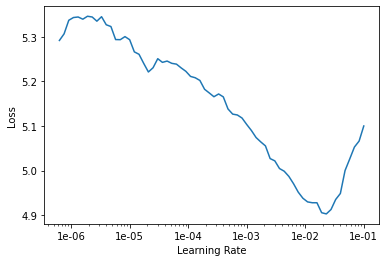

In [63]:
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_fc(80,6e-3, start_pct=0.35)

epoch,train_loss,valid_loss,error_rate,time
0,4.564954,6.262672,0.971132,00:50
1,4.345452,4.903522,0.961209,00:51
2,4.098651,5.611060,0.963915,00:50
3,4.026229,40.274326,0.909337,00:50
4,3.797979,3.114008,0.871448,00:50
5,3.634955,38.031616,0.861073,00:50
6,3.585482,9.716951,0.855661,00:50
7,3.591785,21.094196,0.913396,00:52
8,3.570873,18.420679,0.897158,00:50
9,3.464898,24.382074,0.883175,00:50


In [ ]:
learn.save('origresnet101-nopretrain-lr6e3-ep80-fitfc035')

In [ ]:
learn.recorder.plot_lr()

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [12]:
learn.validate()

[1570.5902, tensor(0.3320)]

### retrain 3e-3, pct_start 0.3

In [13]:
_ = learn.load("origresnet101-nopretrain-lr6e3-ep80-fitfc035")

In [14]:
learn.fit_one_cycle(10, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.427095,835.044312,0.333784,00:50
1,0.481455,779.397766,0.371222,00:49
2,0.585436,350.260681,0.372124,00:49
3,0.669980,28.116600,0.381597,00:49
4,0.621859,5274.099121,0.367614,00:49
5,0.568307,1729.204590,0.346414,00:49
6,0.486661,2618.037109,0.346414,00:49
7,0.447343,2965.516113,0.328823,00:49
8,0.415734,2957.263672,0.324312,00:49
9,0.394034,3367.674805,0.325665,00:49


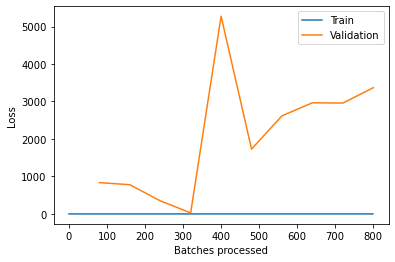

In [15]:
learn.recorder.plot_losses()

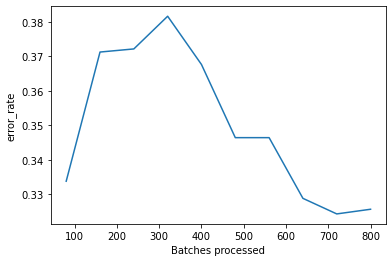

In [16]:
learn.recorder.plot_metrics()

### retrain 6e-3, pct_start 0.3

In [17]:
_ = learn.load("origresnet101-nopretrain-lr6e3-ep80-fitfc035")

In [18]:
learn.fit_one_cycle(10, 6e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.432881,43.292995,0.342806,00:49
1,0.650863,101.634560,0.427154,00:49
2,0.923796,23.666527,0.449256,00:50
3,0.942524,23.851654,0.442490,00:49
4,0.900446,47.537613,0.418133,00:49
5,0.792724,37.251030,0.377537,00:49
6,0.692423,10.619115,0.361750,00:49
7,0.573108,28.995794,0.341452,00:49
8,0.470630,10.188332,0.323861,00:49
9,0.432870,15.401317,0.318899,00:50


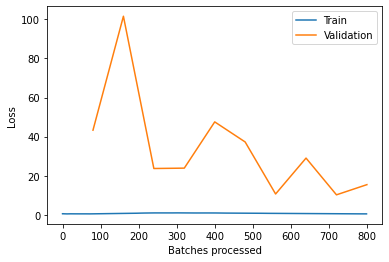

In [19]:
learn.recorder.plot_losses()

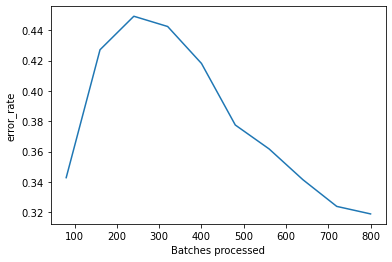

In [20]:
learn.recorder.plot_metrics()

### retrain 3e-3, pct_start 0.2

In [21]:
_ = learn.load("origresnet101-nopretrain-lr6e3-ep80-fitfc035")

In [22]:
learn.fit_one_cycle(10, 3e-3, pct_start=0.2)

epoch,train_loss,valid_loss,error_rate,time
0,0.403391,1090.978027,0.334687,00:49
1,0.608729,3.234790,0.407307,00:49
2,0.676290,575.587219,0.398737,00:49
3,0.674250,234.394516,0.368065,00:49
4,0.623057,27.377195,0.362201,00:49
5,0.557456,119.707527,0.342355,00:49
6,0.483858,250.173996,0.340099,00:50
7,0.427044,238.121933,0.334687,00:50
8,0.410194,293.875793,0.328372,00:49
9,0.390500,411.052216,0.328372,00:49


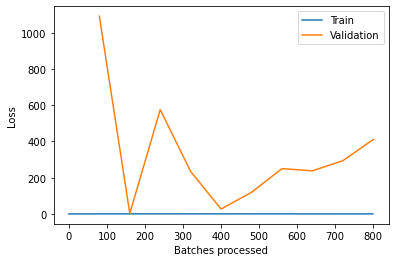

In [23]:
learn.recorder.plot_losses()

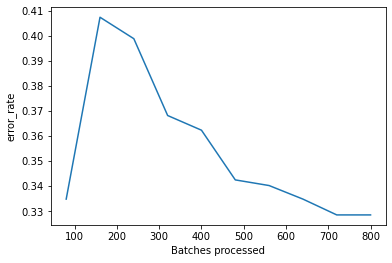

In [24]:
learn.recorder.plot_metrics()

### retrain 3e-3, pct_start 0.2

In [25]:
_ = learn.load("origresnet101-nopretrain-lr6e3-ep80-fitfc035")

In [26]:
learn.fit_one_cycle(10, 3e-3, pct_start=0.2)

epoch,train_loss,valid_loss,error_rate,time
0,0.475283,955.791504,0.358593,00:49
1,0.593373,1.417590,0.379341,00:49
2,0.630824,195.289658,0.402346,00:49
3,0.622260,316.023254,0.376635,00:49
4,0.597771,650.755127,0.367614,00:49
5,0.553035,776.171875,0.350925,00:49
6,0.475356,2827.981445,0.338746,00:49
7,0.432225,1650.003662,0.327921,00:50
8,0.385700,695.278381,0.326567,00:49
9,0.367513,874.119324,0.324763,00:50


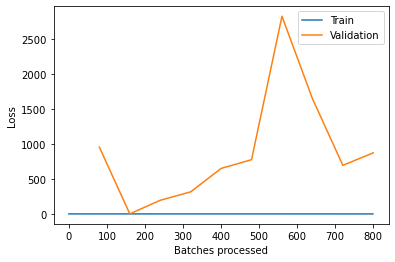

In [27]:
learn.recorder.plot_losses()

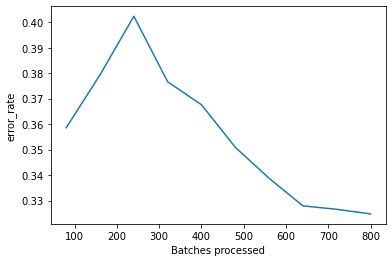

In [28]:
learn.recorder.plot_metrics()

### Interpretation

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

In [30]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

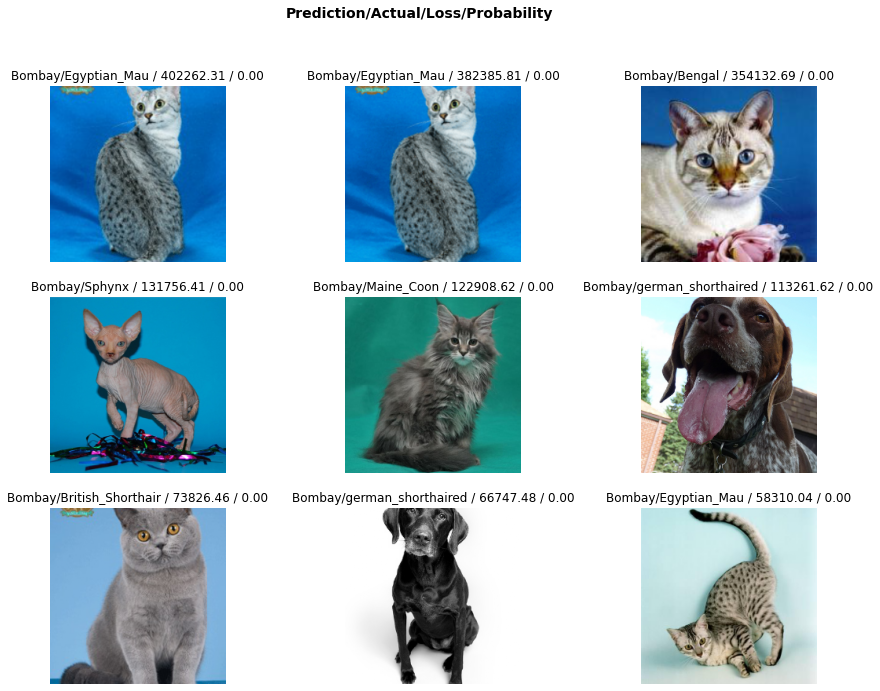

In [31]:
interp.plot_top_losses(9, figsize=(15,11))

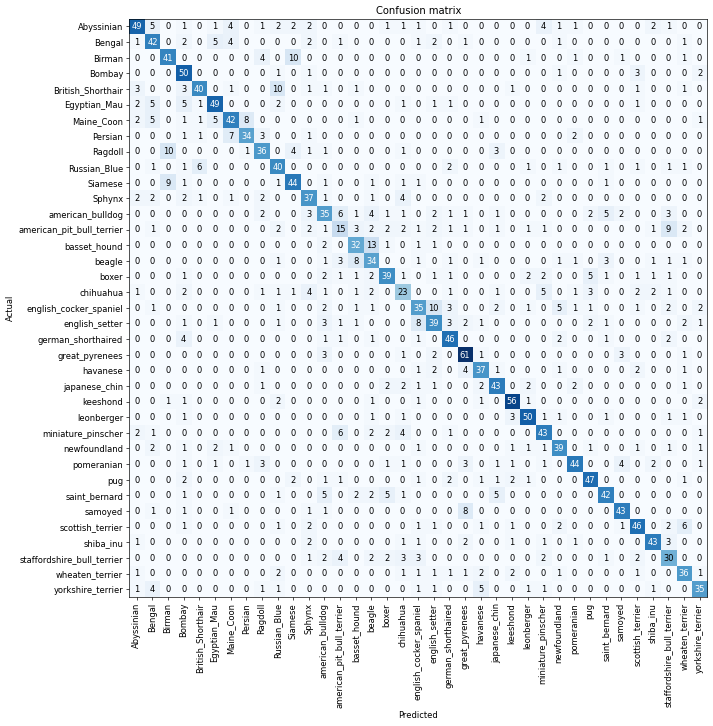

In [32]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [60]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0